In [1]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
#Read Csv file
data=pd.read_csv("Diabetes Dataset.csv",delimiter=",",encoding='utf-8')

In [3]:
#Head of the data
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
# Check for null values in each column
print(data.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
# Check data types of columns
print(data.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


<AxesSubplot:>

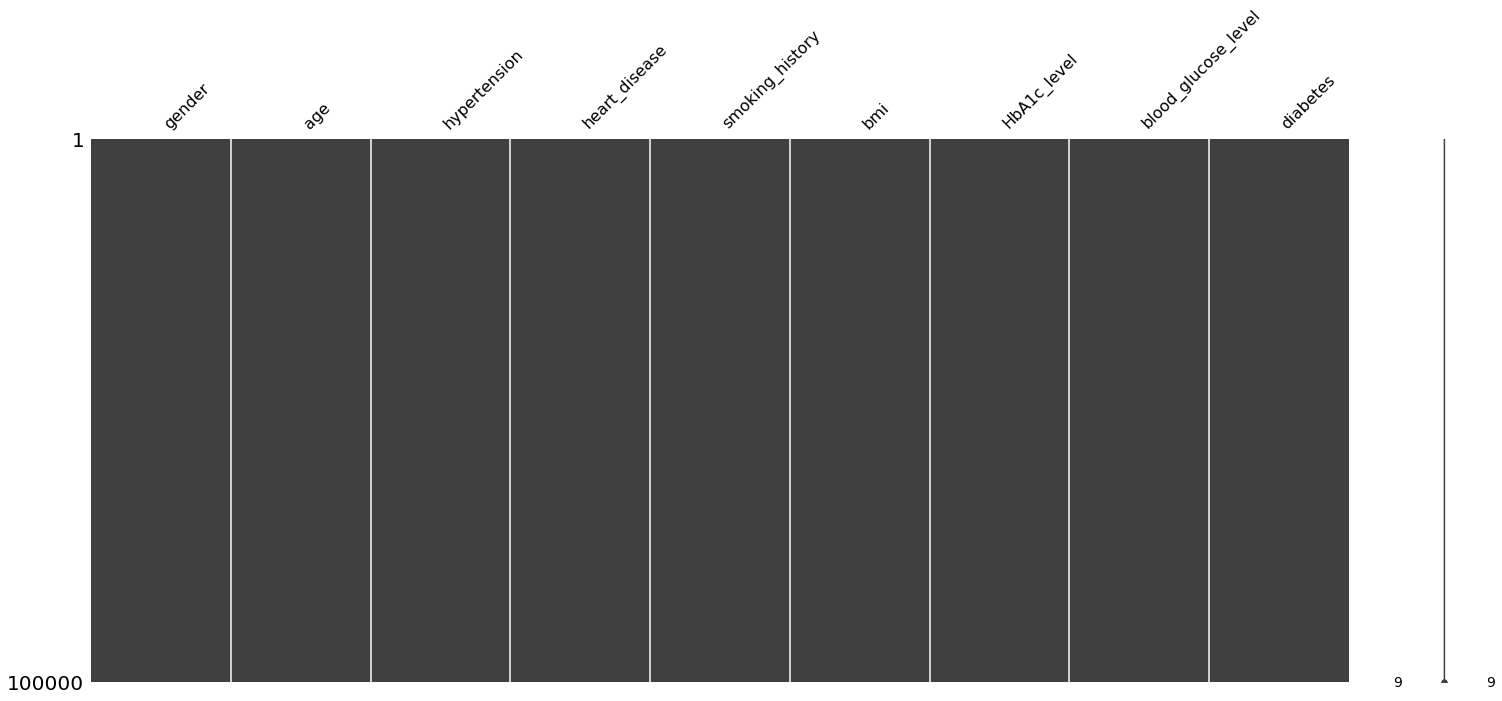

In [6]:
#Null values vizualising
import missingno as masno

data.isnull().sum()
#Matrix chart 
masno.matrix(data) #White represent null values & black represent not null value

In [7]:
# Handle outliers in 'age' column using z-score
z_scores = np.abs((data['age'] - data['age'].mean()) / data['age'].std())
data = data[z_scores < 3]

In [8]:
# Convert 'gender' and 'smoking_history' columns to categorical
data['gender'] = data['gender'].astype('category')
data['smoking_history'] = data['smoking_history'].astype('category')

In [9]:
# Get basic statistics of the dataset
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


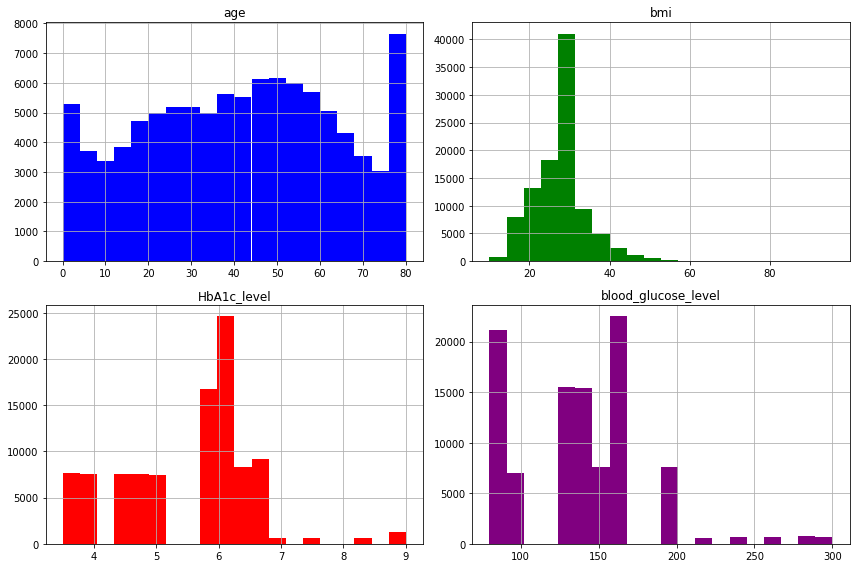

In [10]:
# Create histograms for numerical columns
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Define colors for each histogram
colors = ['blue', 'green', 'red', 'purple']

# Create subplots for each numerical column
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i, col in enumerate(numerical_cols):
    data[col].hist(ax=axs[i], bins=20, color=colors[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

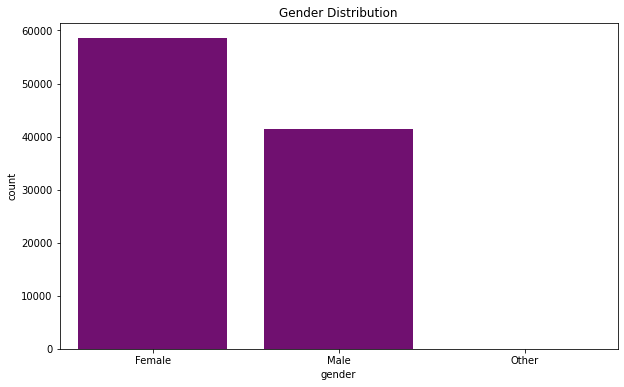

In [11]:
# Create bar charts for categorical columns
plt.figure(figsize=(10, 6))

# Define the color you want for the bars
bar_color = 'purple'

sns.countplot(data=data, x='gender', color=bar_color)
plt.title('Gender Distribution')
plt.show()

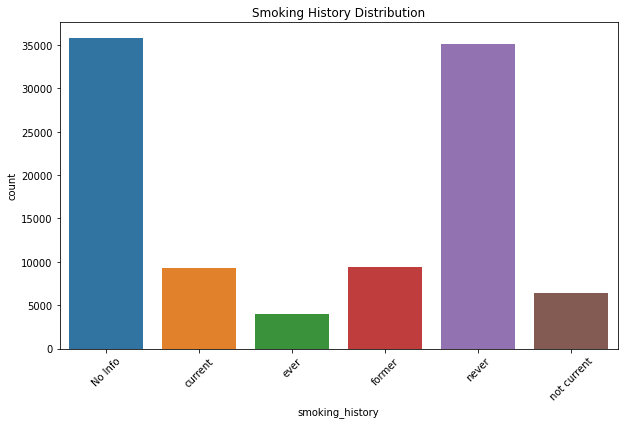

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='smoking_history')
plt.title('Smoking History Distribution')
plt.xticks(rotation=45)
plt.show()

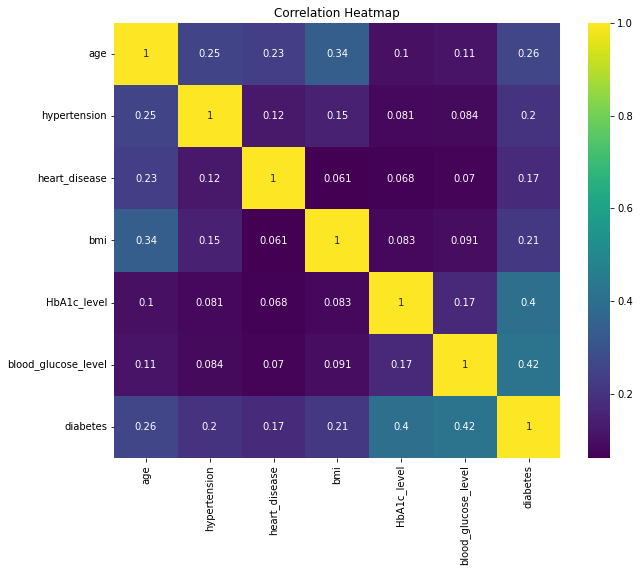

In [13]:
# Explore correlations among variables
correlation_matrix = data.corr()

# Define the colormap you want to use
heatmap_cmap = 'viridis'  # You can choose any colormap you like

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=heatmap_cmap)
plt.title('Correlation Heatmap')
plt.show()

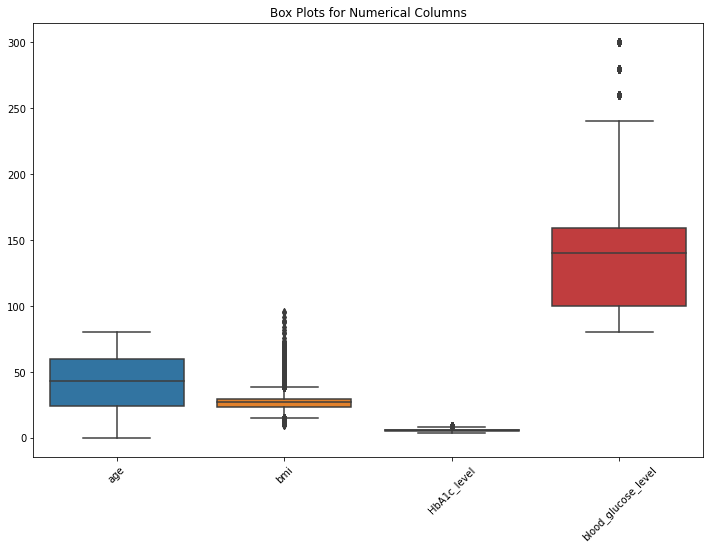

In [14]:
# Box plots for numerical columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_cols])
plt.title('Box Plots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

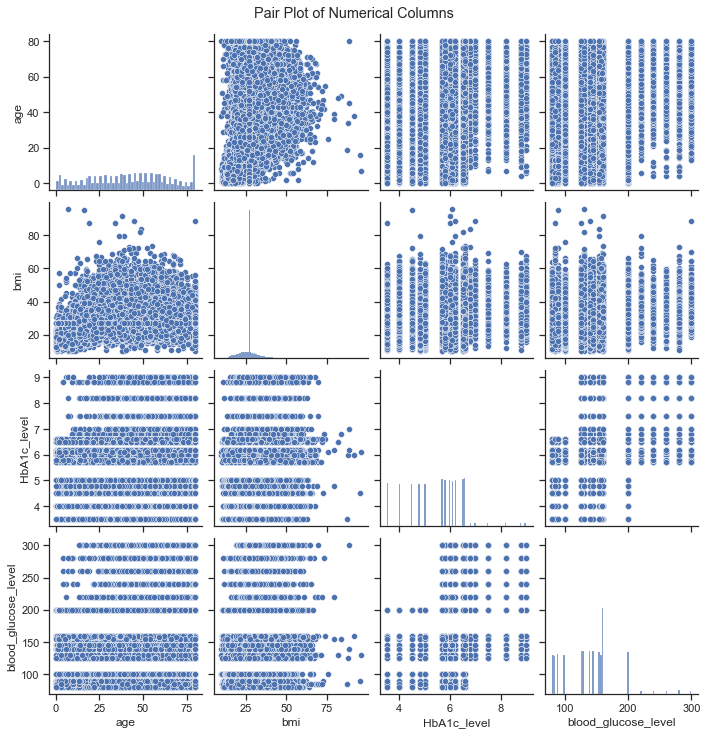

In [15]:
# Box plots for numerical columns to detect outliers
# Define the palette you want to use
pairplot_palette = 'RdGy'  # You can choose any palette you like

sns.set(style="ticks")
pairplot = sns.pairplot(data[numerical_cols], palette=pairplot_palette)
pairplot.fig.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

In [16]:
#Applying Label encoding
ls=LabelEncoder()
data=data.apply(lambda x: ls.fit_transform(x) if (x.dtype !=int) or (x.dtype!=float) else x)

In [17]:
# Standardize numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [18]:
#Seprating x and y for linear regression to find out blood glucose level
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [19]:
#Seprate train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [20]:
#First Model
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

c:\users\fa creations\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred=lr.predict(xtest)

In [22]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[22573   295]
 [ 1276   856]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     22868
           1       0.74      0.40      0.52      2132

    accuracy                           0.94     25000
   macro avg       0.85      0.69      0.74     25000
weighted avg       0.93      0.94      0.93     25000



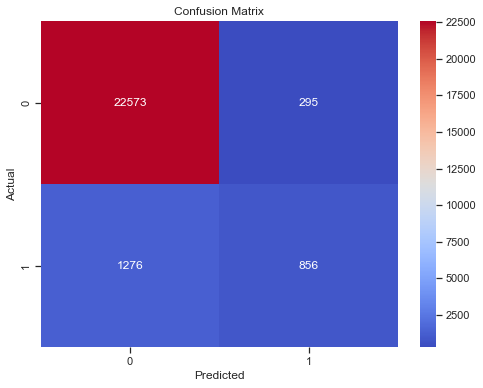

In [23]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Define the colormap you want to use
heatmap_cmap = 'coolwarm'  # You can choose any colormap you like

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=heatmap_cmap)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

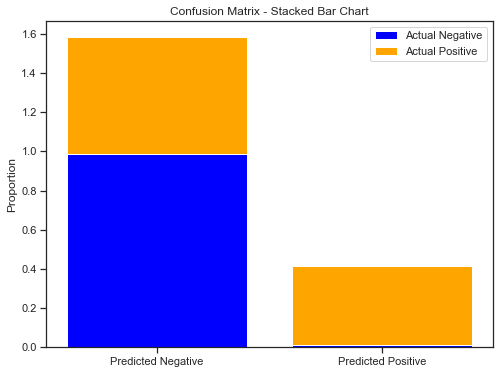

In [24]:
# Calculate the proportions within each row
conf_matrix_proportions = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))

plt.bar([0, 1], conf_matrix_proportions[0], label='Actual Negative', color='blue')
plt.bar([0, 1], conf_matrix_proportions[1], bottom=conf_matrix_proportions[0], label='Actual Positive', color='orange')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.ylabel('Proportion')
plt.title('Confusion Matrix - Stacked Bar Chart')
plt.legend()
plt.show()

In [25]:
#Model 1 accuracy
lr_score = accuracy_score(ytest, y_pred)
print(lr_score)

0.93716


In [26]:
#Second model
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
y_pred=rfc.predict(xtest)

In [27]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[22798    70]
 [  705  1427]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     22868
           1       0.95      0.67      0.79      2132

    accuracy                           0.97     25000
   macro avg       0.96      0.83      0.88     25000
weighted avg       0.97      0.97      0.97     25000



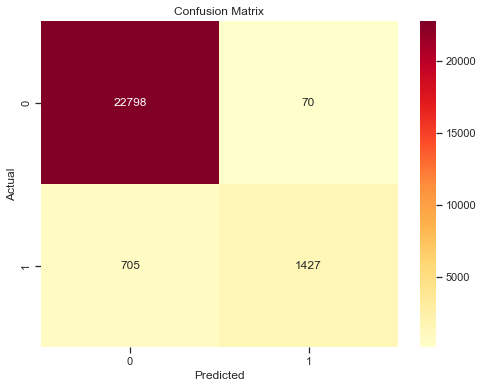

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Define the colormap you want to use
heatmap_cmap = "YlOrRd"  # You can choose any colormap you like

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=heatmap_cmap)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

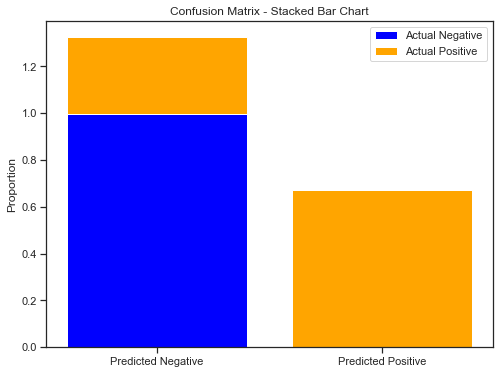

In [29]:
# Calculate the proportions within each row
conf_matrix_proportions = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))

plt.bar([0, 1], conf_matrix_proportions[0], label='Actual Negative', color='blue')
plt.bar([0, 1], conf_matrix_proportions[1], bottom=conf_matrix_proportions[0], label='Actual Positive', color='orange')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.ylabel('Proportion')
plt.title('Confusion Matrix - Stacked Bar Chart')
plt.legend()
plt.show()

In [30]:
#2 nd model accuracy
rfc_score = accuracy_score(ytest, y_pred)
print(rfc_score)

0.969


In [31]:
#Third Model
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
y_pred=gnb.predict(xtest)

In [32]:
# Evaluate the model's performance
conf_matrix = confusion_matrix(ytest, y_pred)
class_report = classification_report(ytest, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[21239  1629]
 [  914  1218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     22868
           1       0.43      0.57      0.49      2132

    accuracy                           0.90     25000
   macro avg       0.69      0.75      0.72     25000
weighted avg       0.91      0.90      0.90     25000



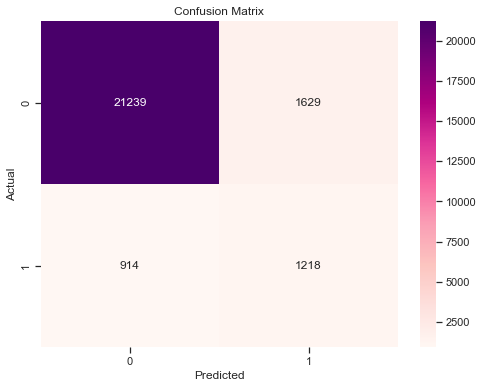

In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))

# Define the colormap you want to use
heatmap_cmap = "RdPu"  # You can choose any colormap you like

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=heatmap_cmap)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

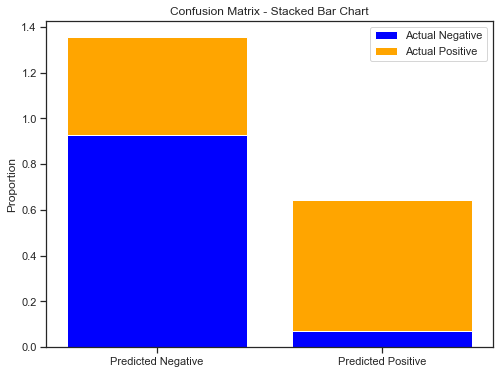

In [34]:
# Calculate the proportions within each row
conf_matrix_proportions = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))

plt.bar([0, 1], conf_matrix_proportions[0], label='Actual Negative', color='blue')
plt.bar([0, 1], conf_matrix_proportions[1], bottom=conf_matrix_proportions[0], label='Actual Positive', color='orange')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.ylabel('Proportion')
plt.title('Confusion Matrix - Stacked Bar Chart')
plt.legend()
plt.show()

In [35]:
#Third model Accuracy score
gnb_score = accuracy_score(ytest, y_pred)
print(gnb_score)

0.89828


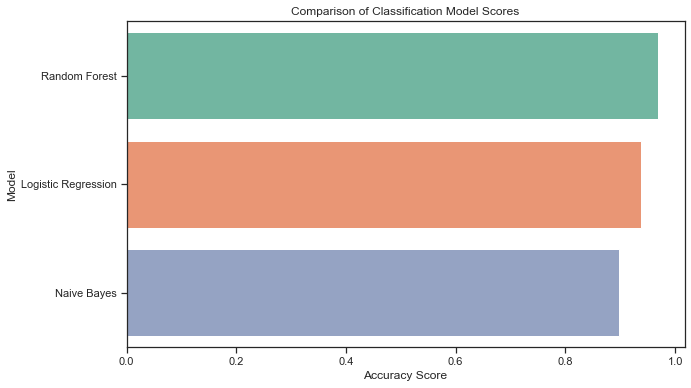

In [36]:
# Create a DataFrame to store the scores
scores_df = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes'],
                           'Accuracy Score': [lr_score, rfc_score, gnb_score]})
# Sort the DataFrame by accuracy score
scores_df = scores_df.sort_values(by='Accuracy Score', ascending=False)

plt.figure(figsize=(10, 6))

# Define the palette you want to use
barplot_palette = 'Set2'  # You can choose any palette you like

sns.barplot(data=scores_df, x='Accuracy Score', y='Model', palette=barplot_palette)
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Comparison of Classification Model Scores')
plt.show()

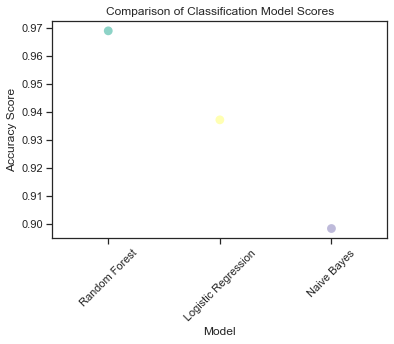

In [37]:
# Point Plot
# Define the palette you want to use
pointplot_palette = 'Set3'  # You can choose any palette you like

# Create a point plot
sns.pointplot(data=scores_df, x='Model', y='Accuracy Score', palette=pointplot_palette)

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Classification Model Scores')
plt.xticks(rotation=45)
plt.show()

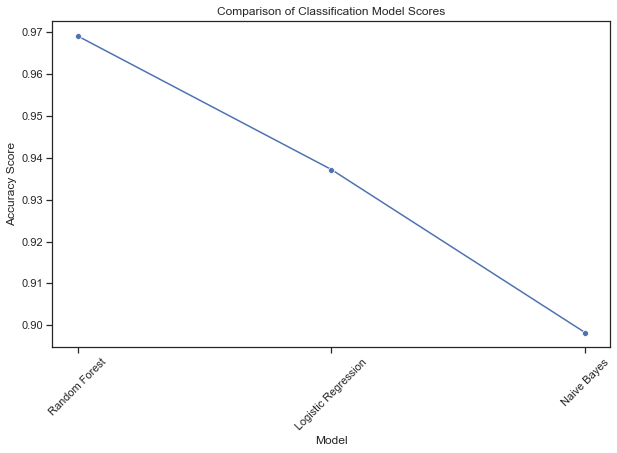

In [38]:
# Line Plot
plt.figure(figsize=(10, 6))

# Define the palette you want to use
lineplot_palette = 'Set1'  # You can choose any palette you like

# Create a line plot
sns.lineplot(data=scores_df, x='Model', y='Accuracy Score', marker='o', palette=lineplot_palette)

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Classification Model Scores')
plt.xticks(rotation=45)
plt.show()